In [1]:
# This will plot the RMSD pair value using the MD analysis
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
u = mda. Universe("step3_charmm2omm.psf", "step5_1.dcd")

In [7]:
# align the structure and calculate the backbone rmsd
aligner = align. AlignTraj(u,u, select = 'name CA', in_memory = True).run()

In [8]:
matrix = diffusionmap.DistanceMatrix(u, select = 'name CA').run()
matrix.dist_matrix.shape

(20, 20)

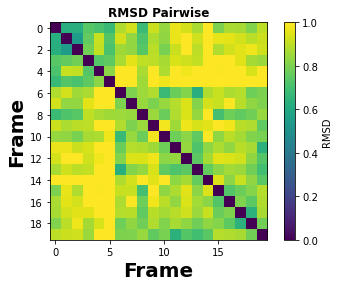

In [62]:
plt.imshow(matrix.dist_matrix, cmap = 'viridis', vmin = 0, vmax = 1)
plt.xlabel('Frame', weight = 'bold', fontsize = 20)
plt.ylabel('Frame', weight = 'bold', fontsize = 20)
plt.colorbar(label = 'RMSD')
ax = plt.gca()
ax.tick_params(axis = 'both', labelsize = 10)
plt.title('RMSD Pairwise', weight = 'bold')
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [63]:
ax.figure.savefig("pair_rmsd.tif",bbox_inches = 'tight', dpi = 600)

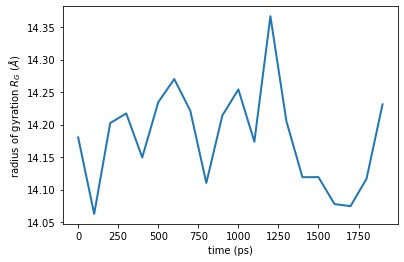

In [9]:
# This will plot the radius of gyration
Rgyr = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
   Rgyr.append((u.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"Radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()

[0.0, 0.618, 0.608, 0.723, 0.704, 0.668, 0.847, 0.898, 0.646, 0.891, 0.813, 0.937, 0.897, 0.844, 0.995, 0.756, 0.838, 0.834, 0.779, 0.864]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


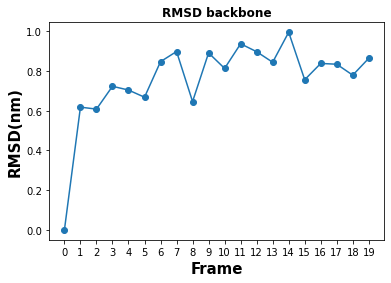

In [70]:
# load the rmsd protein.txt file made from vmd and plot. This plot will give the rmsd with respect to first frame.
frame = []
rmsd_value = []
with open("rmsd_protein.txt", "r") as input:
    readfile = input.readlines()
    for x in readfile[1:]:
        line = x.strip().split()
        frame.append(line[0])
        rmsd_value.append(float(line[1])) 
        
        #print(line)
print(rmsd_value)
print(frame)


plt.scatter(frame,rmsd_value)
plt.plot(frame, rmsd_value)
plt.xlabel('Frame', weight = 'bold', fontsize = 15)
plt.ylabel('RMSD(nm)', weight = 'bold', fontsize = 15)
plt.title('RMSD backbone', weight = 'bold')
plt.savefig("rmsd.tif", bbox_inches = 'tight', dpi = 300)
plt.show()

    

In [ ]:
# rmsd calculation using md analysis

In [81]:
import MDAnalysis
from MDAnalysis.analysis import align, rms


In [82]:
NMP = u.select_atoms("resid 30-59")
u.trajectory[0]   # make sure to be on initial frame
ref_com = NMP.select_atoms("name CA").center_of_mass()
ref0 = NMP.positions - ref_com

[14.240619666865179, 14.124934606595858, 14.265984401602552, 14.284633888487932, 14.214991533964078, 14.310222934372764, 14.33808136475854, 14.28889754027002, 14.183825313820545, 14.294830725610508, 14.313129474662944, 14.231152992900746, 14.432349417043856, 14.275223523671261, 14.185095550478694, 14.187929936398705, 14.144641893903117, 14.15738524856409, 14.179690399518995, 14.293421950927412]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']


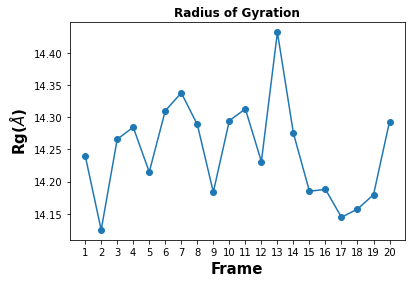

In [2]:
#plot radius of gyration from the vmd
frame_1 = []
rg_value = []
with open("rg.dat", "r") as input:
    readfile = input.readlines()
    for x in readfile[1:]:
        line = x.strip().split()
        frame_1.append(line[0])
        rg_value.append(float(line[1])) 
print(rg_value)
print(frame_1)


plt.scatter(frame_1,rg_value)
plt.plot(frame_1, rg_value)
plt.xlabel('Frame', weight = 'bold', fontsize = 15)
plt.ylabel('Rg($\AA$)', weight = 'bold', fontsize = 15)
plt.title('Radius of Gyration', weight = 'bold')
plt.savefig("rg.tif", bbox_inches = 'tight', dpi = 300)
plt.show()
        


[15.384211540222168, 15.33311939239502, 15.514918327331543, 15.478774070739746, 15.364396095275879, 15.517777442932129, 15.512616157531738, 15.41291618347168, 15.297268867492676, 15.417908668518066, 15.500261306762695, 15.27706241607666, 15.523893356323242, 15.367666244506836, 15.28681468963623, 15.391992568969727, 15.333635330200195, 15.367179870605469, 15.360979080200195, 15.49907398223877]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


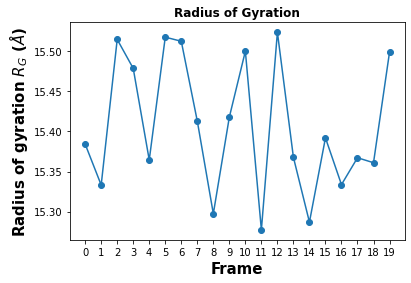

In [15]:
#plot radius of gyration from the vmd
frame_2 = []
rg1_value = []
with open("rg_1.txt", "r") as input:
    readfile = input.readlines()
    for x in readfile:
        line = x.strip().split(',')
        frame_2.append(line[0])
        rg1_value.append(float(line[1])) 
print(rg1_value)
print(frame_2)


plt.scatter(frame_2,rg1_value)
plt.plot(frame_2, rg1_value)
plt.xlabel('Frame', weight = 'bold', fontsize = 15)
plt.ylabel((r"Radius of gyration $R_G$ ($\AA$)"), weight = 'bold', fontsize = 15)
plt.title('Radius of Gyration', weight = 'bold')
plt.savefig("rg_2.tif", bbox_inches = 'tight', dpi = 300)
plt.show()

302.6041566696852
[270.465561983258, 285.36583749128357, 293.3838502513641, 296.32852937022415, 300.75547693135866, 303.20703852666946, 303.9939423634343, 302.20834080486026, 305.5753639310784, 304.4895319964267, 303.6835240481966, 301.3407375800528, 302.31605433290457, 303.0839986047689, 306.0113927138836, 301.4923337897453, 302.7358140232507, 303.09276781619695, 304.176410398263, 302.95817894042744, 305.9419751309186, 300.1075688248388, 299.1048029960824, 303.53500479851465, 302.076819174694, 306.75963383016375, 303.8801710818686, 303.75312183062624, 301.2161537517676, 301.42393330174895, 301.0945820014675, 300.5783162196933, 303.2930972949051, 302.67709814233046, 303.6845193241299, 302.20920521215896, 303.7651931658953, 305.59431093050256, 304.6615201543128, 304.99064537647604, 302.89509809724274, 303.1772202970543, 304.77457943046494, 305.2486401646505, 306.2654236676095, 305.46765698841375, 302.05517843373104, 301.7039911039658, 301.3667811064391, 302.99957252735106, 304.549922537

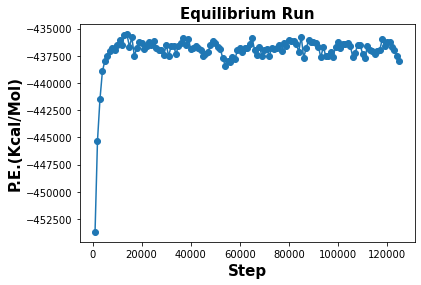

In [35]:
# plot the energy from eqquilibration run
step = []
p_energy = []
tmp = []
with open("step4_equilibration.out", "r") as input:
    readfile = input.readlines()
    #print(readfile)
    for x in readfile[12:]:
        #print(x)
        line = x.strip().split()
        step.append(float(line[1]))
        p_energy.append(float(line[3])) 
        tmp.append(float(line[4]))
#print(step)
#print(p_energy)

print(sum(tmp)/ len(tmp))
print(tmp)
plt.scatter(step,p_energy)
plt.plot(step,p_energy)

plt.xlabel('Step', weight = 'bold', fontsize = 15)
plt.ylabel('P.E.(Kcal/Mol)', weight = 'bold', fontsize = 15)
plt.title('Equilibrium Run', weight = 'bold', fontsize = 15)
plt.savefig("pE_step.tif", bbox_inches = 'tight', dpi = 300)
plt.show()